In [1]:
import pandas as pd
import numpy as np

In [14]:
reg = pd.date_range(start="2022-01-01", periods=36, freq="ME")
sales = 200 + np.arange(36) * 2 + np.sin(np.arange(36) / 6 * np.pi) * 20 + np.random.normal(0, 5, 36)

df = pd.DataFrame({"Data": reg, "Sprzedaz_tys": sales})
print(df.head())

        Data  Sprzedaz_tys
0 2022-01-31    196.175484
1 2022-02-28    208.803821
2 2022-03-31    216.317968
3 2022-04-30    227.628092
4 2022-05-31    224.367429


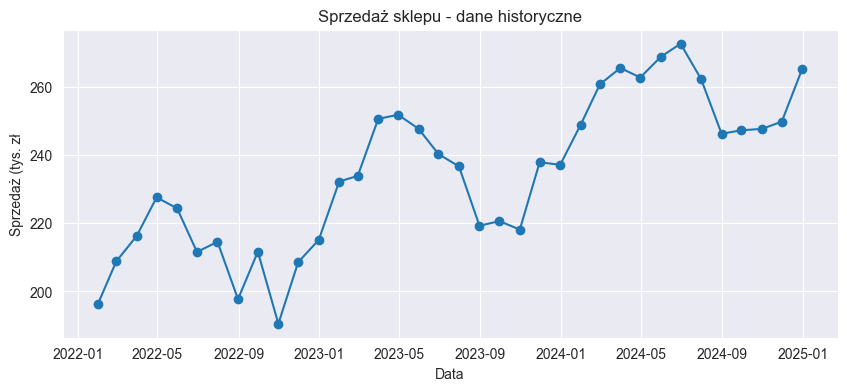

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.plot(df["Data"], df["Sprzedaz_tys"], marker="o")
plt.title("Sprzedaż sklepu - dane historyczne")
plt.xlabel("Data")
plt.ylabel("Sprzedaż (tys. zł")
plt.grid(True)
plt.show()

In [10]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------  9.4/9.6 MB 65.1 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 49.7 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [s


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

df = df.set_index("Data")
df

,Sprzedaz_tys
Data,
2022-01-31,196.175484
2022-02-28,208.803821
2022-03-31,216.317968
2022-04-30,227.628092
2022-05-31,224.367429
2022-06-30,211.558490
2022-07-31,214.565123
2022-08-31,197.693388
2022-09-30,211.640274


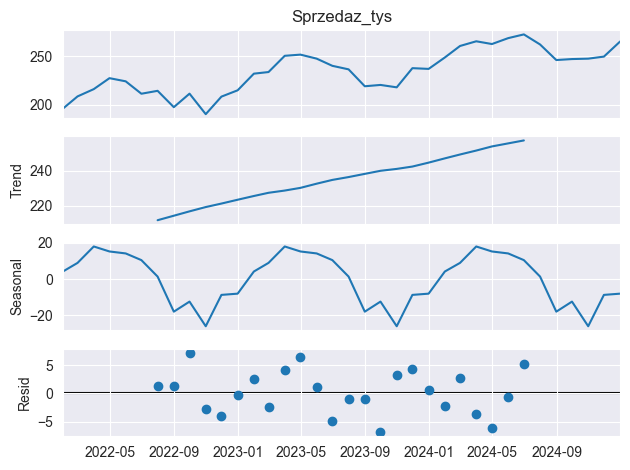

In [17]:
decomp = seasonal_decompose(df["Sprzedaz_tys"], model="additive", period=12)

decomp.plot()
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["Sprzedaz_tys"], order=(1, 1, 1))
fit = model.fit()  # trenowanie modelu

forecast = fit.forecast(steps=6)  # prognoza 6 miesięcy do przodu

forecast

C:\Users\CSComarch\PycharmProjects\PythonProject\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\CSComarch\PycharmProjects\PythonProject\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\CSComarch\PycharmProjects\PythonProject\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


2025-01-31    264.575186
2025-02-28    265.387372
2025-03-31    264.650921
2025-04-30    265.318698
2025-05-31    264.713191
2025-06-30    265.262235
Freq: ME, Name: predicted_mean, dtype: float64

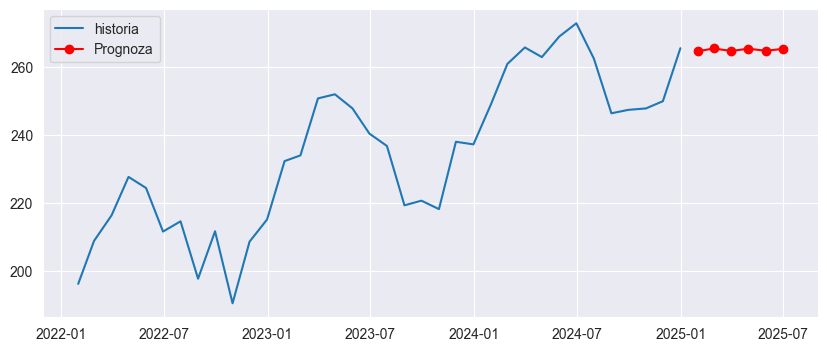

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["Sprzedaz_tys"], label="historia")
plt.plot(forecast.index, forecast, label="Prognoza", color="red", marker="o")
plt.legend()
plt.grid(True)
plt.show()

https://www.kaggle.com/datasets/varpit94/apple-stock-data-updated-till-22jun2021?select=AAPL.csv